# JSL49_01 (CF-900)

In [172]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [69]:
## Preparing some stuff
# Libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib, json, codecs, scipy, scipy.constants
import matplotlib.pyplot as plt
import scipy.stats
import scipy.signal
from IPython.core.display import display, HTML
import mjsplot as mplt
import dateutil

# Display
# display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

# Physical constants
e = scipy.constants.e
k_B = scipy.constants.Boltzmann
h = scipy.constants.h
Rk = h/e**2
Phi_0 = h/e # Flux quantum

# Load data
d = {}
df = {}
def loadin(filename): # a way to load in many different files and keep track of them. 
    datafile = json.loads( codecs.open('../data/'+filename,'r','utf-8').read() )
    key = datafile['attr']['_file counter']
    d[key]= datafile
    df[key] = pd.DataFrame(datafile['data']) 

# Find best match
def find_nu(Bsdh):
    nu = np.linspace(20,1,20)
    Bnu = Phi_0/nu
    Bnu_diff = [t/s for s, t in zip(Bnu, Bnu[1:])]
    Bsdh_diff = np.array([t/s for s, t in zip(Bsdh, Bsdh[1:])])
    size_part = len(Bsdh_diff)
    residuals = [np.sum(Bnu_diff[i:i+size_part]-Bsdh_diff) for i in range(len(Bnu_diff)-size_part+1)]
    idx = np.argmin(np.abs(residuals))
    return nu[idx:idx+len(Bsdh)]

# Extract single subband density and density
def single_subband(Bsdh_all):
    n_band, mu_band, nu_band = [],[],[]
    for vgt,Bsdh in Bsdh_all.items():
        # Find best matching filling factors
        nu = find_nu(Bsdh)
        n = np.mean(Bsdh*nu/Phi_0)*1e-4 
        mu = 1/(r_df_1f[r_df_1f['v'] == vgt]['rho'].values[0] * n * e)
        nu_band.append(nu)
        n_band.append(n)
        mu_band.append(mu)
    return nu_band,n_band,mu_band

# QTplot compatibility
def _mlog(s,quite):
    if not quite:
        print(s)
def _saveBackwardsCompatableFiles(file_path,d,quite=True):
    _mlog('save backwards files for compatability',quite)
    #df = pd.DataFrame(d['data'])
    shortFilepath = file_path[:-5]
    the_time = dateutil.parser.parse(d['attr']['_time start'])
    _mlog('Making a .set file',quite)
    s ='Filename: '+ shortFilepath.split('\\')[-1] + '\n'
    s += 'Timestamp: ' + the_time.strftime("%a %b %d %H:%M:%S %Y") + '\n\n'
    for device in d['attr']['_devices start']:
        s+= 'Instrument: ' + str(device) + ' \n'
        for setting in d['attr']['_devices start'][device]:
            s += '\t' + str(setting) + ': ' + str(d['attr']['_devices start'][device][setting]) +'\n'

    with open(shortFilepath+'.set', 'w') as f:
        f.write(s)
     
    
    _mlog('Making a .dat file',quite)
    s  ='# Filename: '+ shortFilepath.split('\\')[-1]+'.dat' + '\n'
    s += '# Timestamp: ' +  the_time.strftime("%a %b %d %H:%M:%S %Y") + '\n\n'
    i=1; #keep track of column numbers
    keys = []
    #for k in d['attr']['_coordinates']:
    for k_idx in range(len(d['attr']['_coordinates'])):
        k = d['attr']['_coordinates'][k_idx]['name']
        keys.append(k)
        s += '# Column ' + str(i) +":\n"
        s+= '#\tend: '+str(d['attr']['_coordinates'][k_idx]['max']) + '\n'
        s+= '#\tname: '+ str(k) + '\n'
        s+= '#\tsize: '+ str(d['attr']['_coordinates'][k_idx]['size']) + '\n'
        s+= '#\tstart: '+ str(d['attr']['_coordinates'][k_idx]['min']) + '\n'
        s += '#\ttype: coordinate\n'
        i+=1
    cordnames = [ el['name'] for el in d['attr']['_coordinates'] ] 
    for col in d['data']:
        if col not in cordnames:
            keys.append(col)
            s += '# Column ' + str(i) +":\n"
            s += '#\tname: ' + str( col ) +"\n"
            s += '#\ttype: value\n'
            i += 1
    
    s+= '\n'
    #try to remove this line
    #s += df.to_csv(sep='\t' ,columns = keys, index=False, header=False)
    maxl = len(d['data'][keys[0]])
    l=0
    linetext = []
    while l < maxl:
        for j in range(len(keys)):
            linetext.append (  str( d['data'][keys[j]][l] ) )
        s += '\t'.join(linetext) + '\n'
        linetext = []
        l+=1
    
    with open(shortFilepath+'.dat', 'w') as f:
        f.write(s)
        
    _mlog('Making a .meta.txt file',quite)
    s = ''
    i=0
    if '_coordinates' in d['attr']:
        #for k in d['attr']['_coordinates']:
        for k_index in range(len(d['attr']['_coordinates'])):
            s+= str(d['attr']['_coordinates'][k_index]['size']) + '\n'
            s+= str(d['attr']['_coordinates'][k_index]['min']) + '\n'
            s+= str(d['attr']['_coordinates'][k_index]['max']) + '\n'
            s+= str(d['attr']['_coordinates'][k_index]['name']) + '\n'
            i+=1
        for col in d['data']:
            if col not in cordnames:
                # it is a value not a coordinates
                i+=1
                s+= str(i) + '\n'
                s+= str(col)+ '\n'
    with open(shortFilepath+'.meta.txt', 'w') as f:
        f.write(s)


# Hallbar 1

## Density and mobility

## Raw data at Vgate = 0

Density and mobility from Rxy:
n = 3.49e+12 cm^-2
mu = 12324 cm^-2/Vs


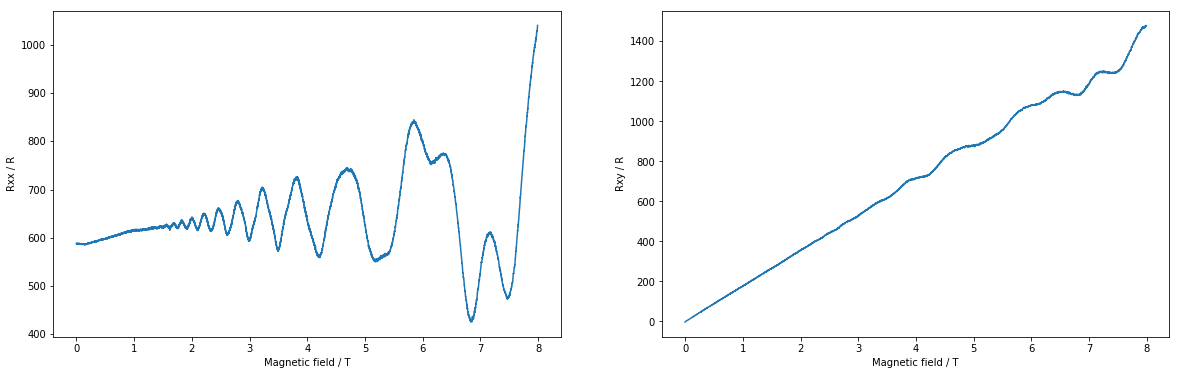

In [147]:
## Load data
loadin("20180625T120910889Z-0009.json")

Rxx = (df['0009']['DC Voltage xx / V'][:9466]+0.0840319348*1e-3)/1e-7
Rxy = (df['0009']['DC Voltage xy / V'][:9466]+0.0849385834*1e-3)/1e-7
Bmeas = df['0009']['Measured Field / T'][:9466]

rho = 581/4

## Plot
fig_1b, ax_1b = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
for ax,plot,ylbl in zip(ax_1b,[(Bmeas,Rxx),(Bmeas,Rxy)],['Rxx / R','Rxy / R']):
    ax.plot(*plot)
    ax.set_xlabel('Magnetic field / T')
    ax.set_ylabel(ylbl)
    
# Save figure
plt.savefig('../plots/hallbar1_rxx_rxy.png')

## Overal density and mobility
n_total = 1/179/e ## Rxy slope
mu_total = 1/(rho*n_total*1e-4*e)
print('Density and mobility from Rxy:\nn = {0:.2e} '.format(n_total*1e-4)+'cm^-2')
print('mu'+' = {0:.0f} '.format(mu_total)+'cm^-2/Vs')

Total density and mobility:
n = 3.49e+16 cm$^{-2}$
${\mu}$ = 12324 cm$^{-2}$/Vs


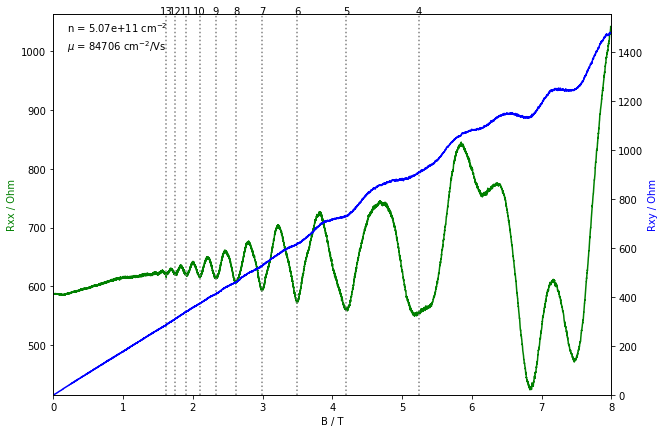

In [134]:
## Filling factors
# B_extra = [6.89277944]
Bsdh = np.array([1.62,1.75,1.91,2.1,2.33,2.62,3,3.5,4.2,5.2]) # Shubnikov- de Haas minima from Rxy

# Find best matching filling factors
nu = find_nu(Bsdh)
n = np.mean(Bsdh*nu/Phi_0)*1e-4
mu = 1/(rho * n * e)
B_nu = n*1e4*Phi_0/nu

## Make overview plot
fig_1c, ax_1c = plt.subplots(figsize=(10,7))
xmax = [min(Rxx)*0.98,0]
ymax = [max(Rxx)*1.02,max(Rxy)*1.05]
for ax,ylims,f,color,label in zip([ax_1c,ax_1c.twinx()],
                    [(xmax[0],ymax[0]),(xmax[1],ymax[1])],
                    [Rxx,Rxy],['green','blue'],
                    ['Rxx / Ohm','Rxy / Ohm']):
    ax.set_xlim(0,8)
    ax.set_ylim(*ylims)
    ax.plot(Bmeas,f,color=color)
    ax.set_xlabel('B / T')
    ax.set_ylabel(label,color=color)

# Density and mobility annotation
ax_1c.annotate('n = {0:.2e} '.format(n)+u'cm$^{-2}$',(0.2,ymax[0]-30))
ax_1c.annotate(u'${\mu}$'+' = {0:.0f} '.format(mu)+u'cm$^{-2}$/Vs',(0.2,ymax[0]-60))

# Filling factors
for xc,nuc in zip(B_nu,nu):
    ax_1c.axvline(x=xc,color='gray',ls=':')
    ax_1c.annotate('{0:.0f}'.format(nuc),(xc,ymax[0]),ha="center")
    
# Save figure
fig_1c.savefig('../plots/hallbar1_subband1.png')
# print("n = {0}, mu = {1}".format(n*1e-4,mu))

## Magnetic field up to 9T with topgate

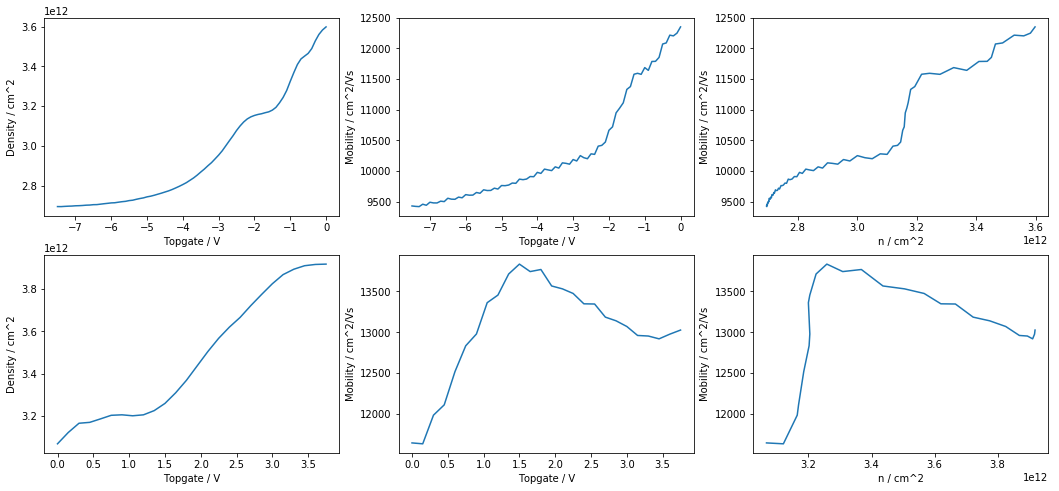

In [75]:
## Load data (not corrected for geometry)
loadin("20180626T145647604Z-0033.json")
loadin("20180627T052100545Z-0034.json")

# Get density
r_df_1a  = pd.DataFrame()
dc_current = 1e-7
for label,group in df['0033'].groupby('Topgate Voltage / V'):
    [b,a] = np.polyfit(group['Magnet Z / T'],group['DC Voltage xy / V']/dc_current,1)
    Vxx = group[group['Magnet Z / T'] == 0.]['DC Voltage xx / V'].values[0]+8.6134e-5
    r_df_1a = r_df_1a.append({'a':a,'b':b,'n':1/(e*b)*1e-4,'v':label,'Vxx':Vxx},ignore_index=True)
# Get mobility
r_df_1a['rho'] = r_df_1a['Vxx']/(dc_current * 4) # Mesa contains 4 squares
r_df_1a['mu'] = 1/(r_df_1a['rho']*r_df_1a['n']*e)

# Get density
r_df_1b  = pd.DataFrame()
dc_current = 1e-7
for label,group in df['0034'].groupby('Topgate Voltage / V'):
    [b,a] = np.polyfit(group['Magnet Z / T'],group['DC Voltage xy / V']/dc_current,1)
    Vxx = group[group['Magnet Z / T'] == 0.]['DC Voltage xx / V'].values[0]+8.6134e-5
    r_df_1b = r_df_1b.append({'a':a,'b':b,'n':1/(e*b)*1e-4,'v':label,'Vxx':Vxx},ignore_index=True)
    
# Get mobility
r_df_1b['rho'] = r_df_1b['Vxx']/(dc_current * 4) # Mesa contains 4 squares
r_df_1b['mu'] = 1/(r_df_1b['rho']*r_df_1b['n']*e)

## Plot
fig_1a, ax_1a = plt.subplots(nrows=2, ncols=3, figsize=(18,8))

subplots_1a = [(r_df_1a['v'],r_df_1a['n']),(r_df_1a['v'],r_df_1a['mu']),(r_df_1a['n'],r_df_1a['mu']),
              (r_df_1b['v'],r_df_1b['n']),(r_df_1b['v'],r_df_1b['mu']),(r_df_1b['n'],r_df_1b['mu'])]
labels_1a = [['Topgate / V','Density / cm^2'],['Topgate / V', 'Mobility / cm^2/Vs'], ['n / cm^2','Mobility / cm^2/Vs'],
            ['Topgate / V','Density / cm^2'],['Topgate / V', 'Mobility / cm^2/Vs'], ['n / cm^2','Mobility / cm^2/Vs']]

for col,subplot,label in zip(sum(ax_1a.tolist(),[]),subplots_1a,labels_1a):
    col.plot(*subplot)
    col.set_xlabel(label[0])
    col.set_ylabel(label[1])

# Save figure
fig_1a.savefig('../plots/hallbar1_mobilty_density.png')

## Track individual subbands with gate

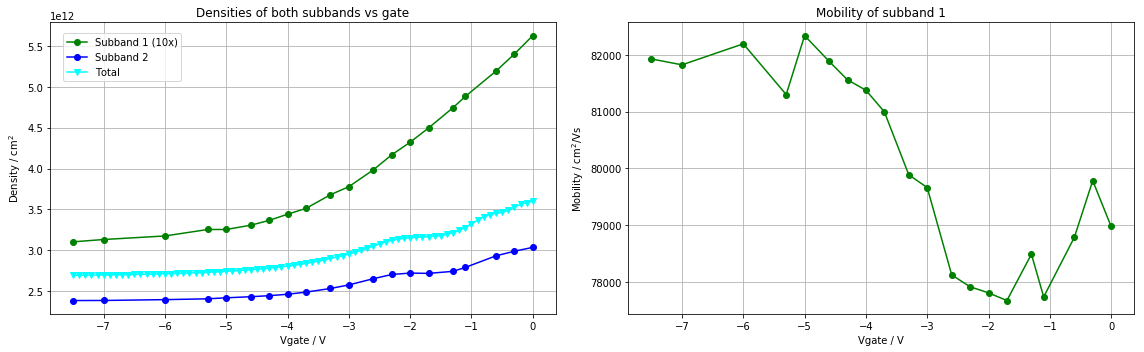

In [238]:
Bsdh_all = {}
Bsdh_all[0] = [1.94,2.13,2.33,2.58,2.91,3.3]
Bsdh_all[-0.3] = [2.03,2.23,2.5,2.78,3.2,3.71] 
Bsdh_all[-.6] = [2.15,2.4,2.67,3.07,3.57] 
Bsdh_all[-1.1] = [2.02,2.25,2.5,2.89,3.38] 
Bsdh_all[-1.3] = [1.98,2.18,2.45,2.8,3.25] 
Bsdh_all[-1.7] = [1.86,2.07,2.3,2.67,3.11] 
Bsdh_all[-2] = [1.79,1.99,2.23,2.55,2.98]
Bsdh_all[-2.3] = [1.91,2.15,2.45,2.9,3.45] 
Bsdh_all[-2.6] = [1.67,1.83,2.05,2.34,2.74] 
Bsdh_all[-3] = [1.73,1.97,2.25,2.6,3.09] 
Bsdh_all[-3.3] = [1.52,1.7,1.92,2.15,2.53] 
Bsdh_all[-3.7] = [1.46,1.6,1.82,2.07,2.43] 
Bsdh_all[-4] = [1.43,1.57,1.78,2.03,2.38] 
Bsdh_all[-4.3] = [1.54,1.74,2,2.32,2.78]
Bsdh_all[-4.6] = [1.52,1.71,1.95,2.27,2.75]
Bsdh_all[-5] = [1.5,1.69,1.92,2.24,2.68]
Bsdh_all[-5.3] = [1.5,1.69,1.92,2.24,2.68]
Bsdh_all[-6] = [1.45,1.65,1.88,2.2,2.61]
Bsdh_all[-7] = [1.63,1.84,2.17,2.58,3.23]
Bsdh_all[-7.499999999999999] = [1.44,1.6,1.83,2.15,2.54]

# Get density from Rxx data (single channel)
n_band1, mu_band1, nu_band1 = [],[],[]
for vgate,Bsdh in Bsdh_all.items():
    # Find best matching filling factors
    nu = find_nu(Bsdh)
    n = np.mean(Bsdh*nu/Phi_0)*1e-4 
    mu = 1/(r_df_1a[r_df_1a['v'] == vgate]['rho'].values[0] * n * e)
    nu_band1.append(nu)
    n_band1.append(n)
    mu_band1.append(mu)
    
# Get densities from Rxy data (all channels combined) 
v_tot = [r_df_1a[r_df_1a['v'] == vgate]['v'].values[0] for vgate,_ in Bsdh_all.items()]  
n_tot = [r_df_1a[r_df_1a['v'] == vgate]['n'].values[0] for vgate,_ in Bsdh_all.items()]

# Plot both channels as a function of gate
fig_1d, ax_1d = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
for axes,plot,label,ls,color,ylabel,title in zip(
                                     [ax_1d[0],ax_1d[0],ax_1d[0],ax_1d[1]],
                                     [([vgate for vgate,_ in Bsdh_all.items()], np.array(n_band1)*10),
                                      (v_tot, np.array(n_tot)-np.array(n_band1)),
                                      (r_df_1a['v'], r_df_1a['n']),
                                      ([vgate for vgate,_ in Bsdh_all.items()],mu_band1)],
                                     ['Subband 1 (10x)','Subband 2','Total',''],
                                     ['o-','o-','v-','o-'],
                                     ['green','blue','cyan','green'],
                                     [u'Density / cm$^{2}$']*3+[u'Mobility / cm$^{2}$/Vs'],
                                     ['Densities of both subbands vs gate']*3+['Mobility of subband 1']):
    axes.plot(*plot,ls,label=label,color=color)
    axes.set_xlabel('Vgate / V')
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.grid(which='major')
fig_1d.legend(loc='upper left', bbox_to_anchor=(0.05,0.9))
fig_1d.tight_layout()

# Save figure
fig_1d.savefig('../plots/hallbar1_subbands_vgate_negative.png')

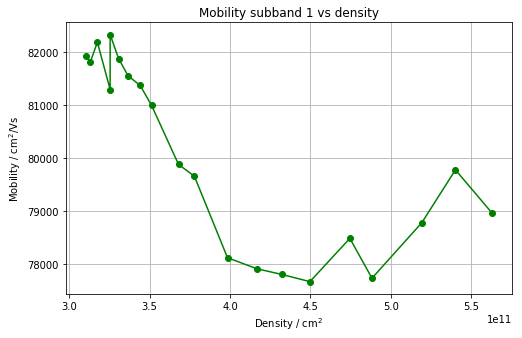

In [239]:
fig_1e, ax_1e = plt.subplots(figsize=(8,5))
ax_1e.plot(n_band1,mu_band1,'o-',color='green')
ax_1e.set_xlabel(u'Density / cm$^{2}$')
ax_1e.set_ylabel(u'Mobility / cm$^{2}$/Vs')
ax_1e.set_title('Mobility subband 1 vs density')
ax_1e.grid(which='major')

# Save figure
fig_1e.savefig('../plots/hallbar1_subband1_mobility_vs_density.png')

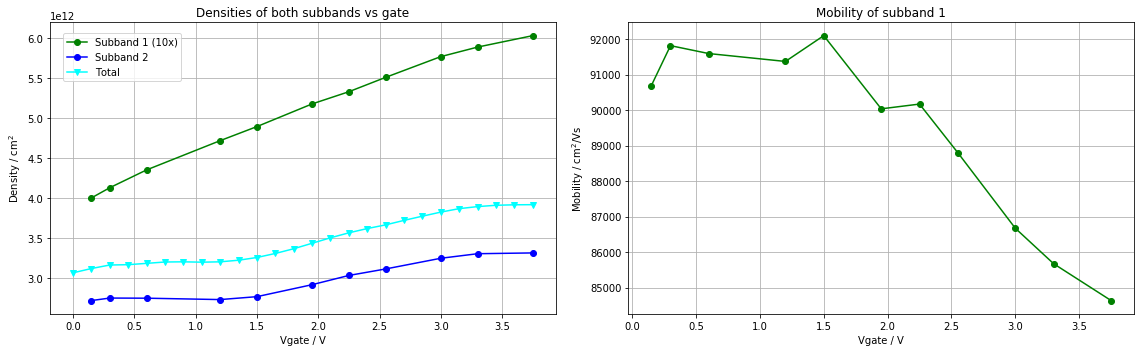

In [61]:
# Positive Vgate dataset 20180627T052100545Z-0034.json
Bsdh_all = {}
Bsdh_all[.15] = [2.09,2.36,2.73,3.32]
Bsdh_all[.3] = [1.9,2.13,2.45,2.84]
Bsdh_all[.6] = [1.81,2,2.24,2.57]
Bsdh_all[1.2] = [1.94,2.17,2.45,2.79]
Bsdh_all[1.5] = [1.85,2.03,2.24,2.52]
Bsdh_all[1.95] = [1.94,2.16,2.38,2.67,3.05]
Bsdh_all[2.25] = [2.2,2.45,2.76,3.15]
Bsdh_all[2.55] = [2.08,2.27,2.53,2.85]
Bsdh_all[3] = [2.17,2.38,2.65,2.99]
Bsdh_all[3.3] = [2.22,2.42,2.71,3.05]
Bsdh_all[3.7499999999999996] = [1.78,1.92,2.09,2.26,2.49]


# Get density from Rxx data (single channel)
n_band1, mu_band1, nu_band1 = [],[],[]
for vgate,Bsdh in Bsdh_all.items():
    # Find best matching filling factors
    nu = find_nu(Bsdh)
    n = np.mean(Bsdh*nu/Phi_0)*1e-4 
    mu = 1/(r_df_1b[r_df_1b['v'] == vgate]['rho'].values[0] * n * e)
    nu_band1.append(nu)
    n_band1.append(n)
    mu_band1.append(mu)
    
# Get densities from Rxy data (all channels combined) 
v_tot = [r_df_1b[r_df_1b['v'] == vgate]['v'].values[0] for vgate,_ in Bsdh_all.items()]  
n_tot = [r_df_1b[r_df_1b['v'] == vgate]['n'].values[0] for vgate,_ in Bsdh_all.items()]

# Plot both channels as a function of gate
fig_1d, ax_1d = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
for axes,plot,label,ls,color,ylabel,title in zip(
                                     [ax_1d[0],ax_1d[0],ax_1d[0],ax_1d[1]],
                                     [([vgate for vgate,_ in Bsdh_all.items()], np.array(n_band1)*10),
                                      (v_tot, np.array(n_tot)-np.array(n_band1)),
                                      (r_df_1b['v'], r_df_1b['n']),
                                      ([vgate for vgate,_ in Bsdh_all.items()],mu_band1)],
                                     ['Subband 1 (10x)','Subband 2','Total',''],
                                     ['o-','o-','v-','o-'],
                                     ['green','blue','cyan','green'],
                                     [u'Density / cm$^{2}$']*3+[u'Mobility / cm$^{2}$/Vs'],
                                     ['Densities of both subbands vs gate']*3+['Mobility of subband 1']):
    axes.plot(*plot,ls,label=label,color=color)
    axes.set_xlabel('Vgate / V')
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.grid(which='major')
fig_1d.legend(loc='upper left', bbox_to_anchor=(0.05,0.9))
fig_1d.tight_layout()

# Save figure
fig_1d.savefig('../plots/hallbar1_subbands_vgate_positive.png')

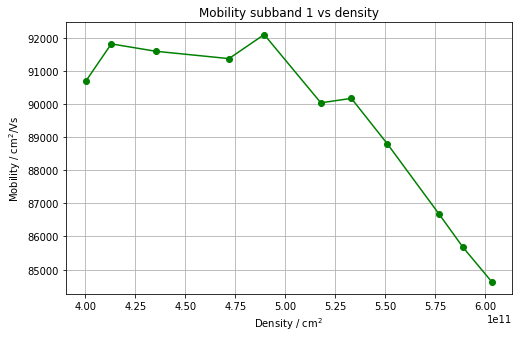

In [62]:
fig_1e, ax_1e = plt.subplots(figsize=(8,5))
ax_1e.plot(n_band1,mu_band1,'o-',color='green')
ax_1e.set_xlabel(u'Density / cm$^{2}$')
ax_1e.set_ylabel(u'Mobility / cm$^{2}$/Vs')
ax_1e.set_title('Mobility subband 1 vs density')
ax_1e.grid(which='major')

# Save figure
fig_1e.savefig('../plots/hallbar1_subband1_mobility_vs_density.png')

## Processed Vxy data

In [171]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/dbouman1/2deg/master/img/qh_xy_deriv.png")

## Bfield sweeps vs gate

In [71]:
## Load data
loadin("20180628T180227174Z-0052.json")

In [74]:
## Separate up and down sweeps
df['0052']['Direction'] = np.sign( np.gradient(df['0052']['Measured Field / T'].values) )
tdf = df['0052'][df['0052']['Measured Field / T'] > -0.085]
up_tdf=tdf[tdf['Direction'] > 0 ]
down_tdf = tdf[tdf['Direction'] < 0 ]
# Add to original dataset
dout = d['0052']
dout['data_up'] = up_tdf.to_dict(orient='list')
dout['data_down'] = down_tdf.to_dict(orient='list')
# # Export json file
# with open('../processed/20180628T180227174Z-0052_processed.json', 'w') as outfile:
#     json.dump(dout, outfile)

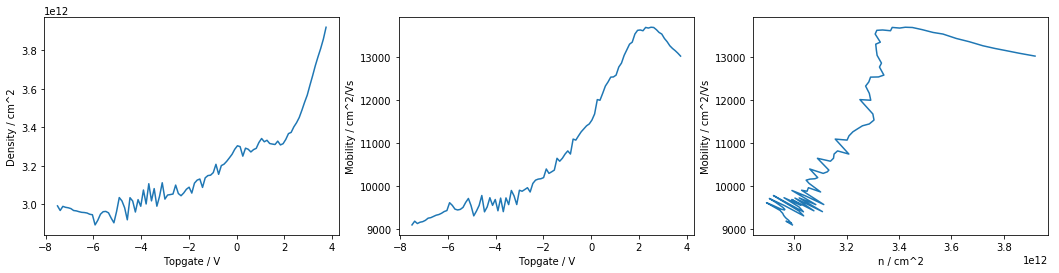

In [67]:
# Get density
r_df_1f  = pd.DataFrame()
ac_current = 10e-9
for label,group in up_tdf.groupby('Topgate Voltage / V'):
    [b,a] = np.polyfit(group['Measured Field / T'],group['AC Voltage xy / V']/ac_current,1)
    Vxx = group.iloc[group['Measured Field / T'].abs().argsort()[:1]]['AC Voltage xx / V'].values[0]
    r_df_1f = r_df_1f.append({'a':a,'b':b,'n':1/(e*b)*1e-4,'v':label,'Vxx':Vxx},ignore_index=True)
    
# Calculate mobility
r_df_1f['rho'] = r_df_1f['Vxx']/(ac_current * 4) # Mesa contains 4 squares
r_df_1f['mu'] = 1/(r_df_1f['rho']*r_df_1f['n']*e)

## Plot
fig_1f, ax_1f = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

subplots_1f = [(r_df_1f['v'],r_df_1f['n']),(r_df_1f['v'],r_df_1f['mu']),(r_df_1f['n'],r_df_1f['mu'])]
labels_1f = [['Topgate / V','Density / cm^2'],['Topgate / V', 'Mobility / cm^2/Vs'], ['n / cm^2','Mobility / cm^2/Vs']]

for col,subplot,label in zip(ax_1f,subplots_1f,labels_1f):
    col.plot(*subplot)
    col.set_xlabel(label[0])
    col.set_ylabel(label[1])

# Save figure
fig_1f.savefig('../plots/hallbar1_mobilty_density_2.png')

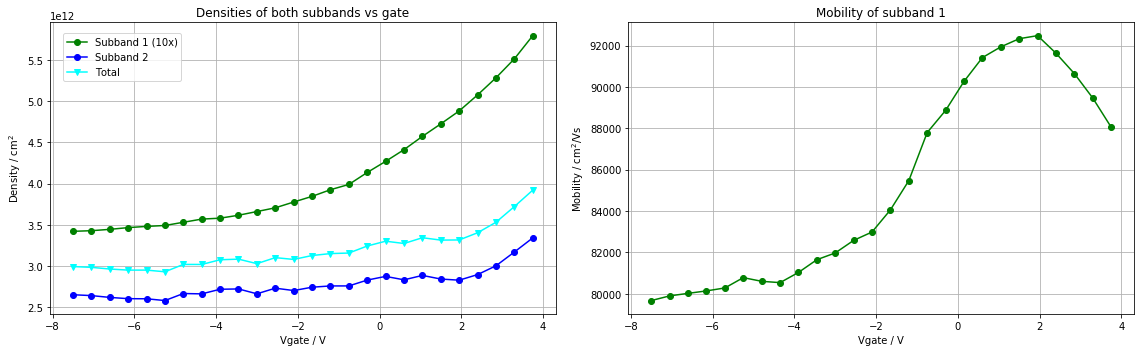

In [72]:
## Vgate dataset 0052
vgate = df['0052']['Topgate Voltage / V'].unique()[::4]
Bsdh_all = {}
dips = [[1.85,1.99,2.18,2.4,2.66,2.99],[1.75,1.9,2.07,2.29,2.53,2.85],[1.68,1.82,1.99,2.18,2.43,2.73],[1.75,1.91,2.1,2.33,2.62],
                    [1.68,1.84,2.02,2.24,2.52],[1.63,1.78,1.95,2.16,2.45],[1.58,1.72,1.88,2.1,2.37],[1.52,1.66,1.82,2.03,2.28],
                    [1.96,2.21,2.53,2.94,3.52],[1.56,1.71,1.9,2.13,2.44,2.85],[1.36,1.5,1.66,1.84],[1.48,1.63,1.8,2.03,2.31,2.7],
                    [1.45,1.58,1.77,1.99,2.27],[1.42,1.55,1.75,1.95,2.23,2.6],[1.39,1.53,1.7,1.92,2.19,2.56],[1.37,1.51,1.68,1.9,2.17],
                    [1.35,1.49,1.66,1.87,2.15,2.5],[1.34,1.48,1.64,1.85,2.12,2.48],[2.1,2.47,2.95],[1.81,2.08,2.45,2.93],[1.2,1.31,1.45],
                    [2.9,3.57],[1.3,1.43,1.6,1.79],[1.43,1.58,1.78,2.03],[1.42,1.575,1.773,2.02],[1.29,1.41,1.57,1.77,2.02]]
Bsdh_all = {key: value for key,value in zip(vgate,dips)}
   
# Get density from Rxx data (single channel)
nu_band1, n_band1, mu_band1 = single_subband(Bsdh_all)

# Get densities from Rxy data (all channels combined) 
v_tot = [r_df_1f[r_df_1f['v'] == vgt]['v'].values[0] for vgt,_ in Bsdh_all.items()]  
n_tot = [r_df_1f[r_df_1f['v'] == vgt]['n'].values[0] for vgt,_ in Bsdh_all.items()]

def plot_fig(rows,cols,axes,plots,label,ls,color,axes_labels):
    """
        rows,cols: number of rows and columns
        axes: list of indexes of the axes, same length as plots
        
    """
    fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(6*ncols,4*rows))
    for axis,plot,label,ls,color,axes_labels,title in zip([ax[x] for x in axes],plots,
                                                         ):
        if color:
            axis.plot(*plot,ls,label=label,color=color)
        else:
            axis.plot(*plot,ls,label=label)
        axis.set_xlabel(axes_labels[0])
        axis.set_ylabel(axes_labels[1])
        axis.set_title(title)

# Plot both channels as a function of gate
fig_1g, ax_1g = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
for axes,plot,label,ls,color,ylabel,title in zip(
                                     [ax_1g[0],ax_1g[0],ax_1g[0],ax_1g[1]],
                                     [([vgt for vgt,_ in Bsdh_all.items()], np.array(n_band1)*10),
                                      (v_tot, np.array(n_tot)-np.array(n_band1)),
                                      (v_tot, n_tot),
                                      ([vgt for vgt,_ in Bsdh_all.items()],mu_band1)],
                                     ['Subband 1 (10x)','Subband 2','Total',''],
                                     ['o-','o-','v-','o-'],
                                     ['green','blue','cyan','green'],
                                     [u'Density / cm$^{2}$']*3+[u'Mobility / cm$^{2}$/Vs'],
                                     ['Densities of both subbands vs gate']*3+['Mobility of subband 1']):
    axes.plot(*plot,ls,label=label,color=color)
    axes.set_xlabel('Vgate / V')
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.grid(which='major')
fig_1g.legend(loc='upper left', bbox_to_anchor=(0.05,0.9))
fig_1g.tight_layout()

# Save figure
fig_1g.savefig('../plots/hallbar1_subbands_vgate_positive_2.png')

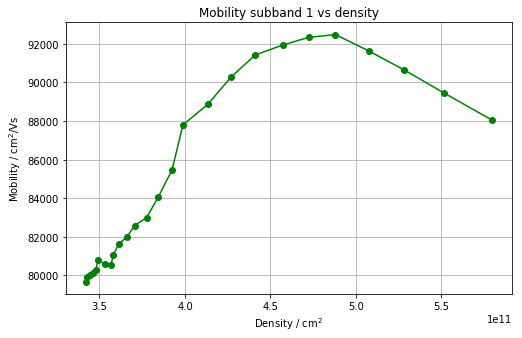

In [60]:
fig_1h, ax_1h = plt.subplots(figsize=(8,5))
ax_1h.plot(n_band1,mu_band1,'o-',color='green')
ax_1h.set_xlabel(u'Density / cm$^{2}$')
ax_1h.set_ylabel(u'Mobility / cm$^{2}$/Vs')
ax_1h.set_title('Mobility subband 1 vs density')
ax_1h.grid(which='major')

# Save figure
fig_1h.savefig('../plots/hallbar1_subband1_mobility_vs_density.png')

In [ ]:
## .dat file
_saveBackwardsCompatableFiles('../processed/updata',dout,quite=False)

# Plot for fixed vgate
up_tdf = up_tdf[up_tdf['Topgate Voltage / V'] == 3.6379034103913956]
down_tdf = down_tdf[down_tdf['Topgate Voltage / V'] == 3.6379034103913956]

plt.plot(up_tdf['Measured Field / T'],up_tdf['AC Voltage xx / V'])
plt.plot(down_tdf['Measured Field / T'],down_tdf['AC Voltage xx / V'])

## TODO
 - scipy grid interpolate (for backwards compatible file)